<a href="https://colab.research.google.com/github/RA2112704010029/Financial-Machine-Learning-Situation-Questions/blob/main/HOTS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#QUESTION :

A trading strategy requires clustering a set of financial stocks into
homogeneous groups based on historical price and volatility. Explain
how you would use the k-means clustering algorithm for this purpose
and demonstrate how you would determine the optimal number of
clusters. Include relevant Python code snippets.

# 1. LOAD THE DATASET

In [ ]:
# Load the required libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Define the stock tickers to analyze ( tickers -  an abbreviation used to uniquely identify publicly traded shares of a particular stock on a stock exchange)
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NFLX',  'V', 'JPM', 'DIS']  # Example tickers ( that will be analyzed here)

# Download historical stock data using yfinance
data = yf.download(tickers, start="2020-01-01", end="2023-10-01")['Adj Close']

[*********************100%***********************]  9 of 9 completed


# 2. PREPROCESS THE DATASET

In [ ]:
# Calculate daily returns and volatility
returns = data.pct_change().dropna()  # Calculate daily percentage change (returns)
volatility = returns.rolling(window=21).std().dropna()  # 21-day rolling standard deviation (monthly volatility)

In [ ]:
# Prepare the data for clustering
# We'll use the mean returns and volatility for each stock as features
mean_returns = returns.mean()
mean_volatility = volatility.mean()

In [ ]:
# Create a DataFrame with the features
features = pd.DataFrame({
    'Mean_Returns': mean_returns,
    'Mean_Volatility': mean_volatility
})

In [ ]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 3. TRAIN, TEST & EVALUATE THE DATASET

1. ELBOW METHOD FOR CLUSTERING

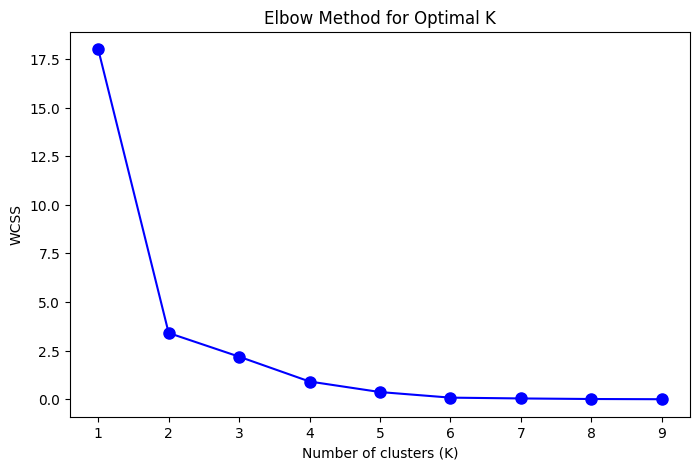

In [ ]:
# Use the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

2. SILHOUETTE METHOD

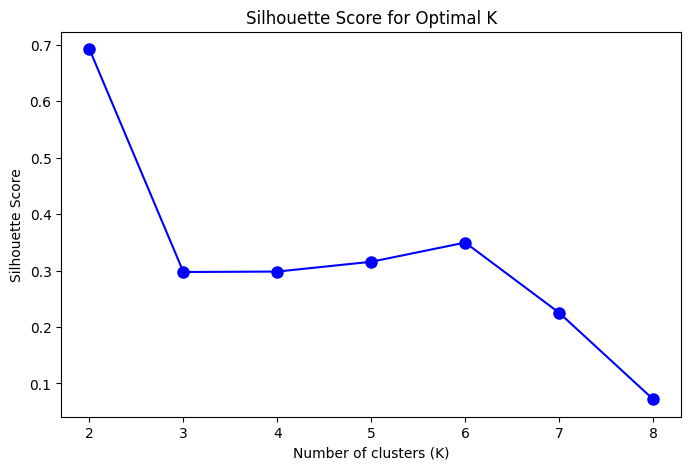

In [ ]:
# Use Silhouette Score to determine optimal K
silhouette_scores = []
for k in range(2, 9):  # Adjust the range to be within the number of samples
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(features_scaled, labels))

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), silhouette_scores, 'bo-', markersize=8)
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

APPLYING K MEANS CLUSTERING

In [ ]:
# Apply K-means clustering with the optimal number of clusters
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because silhouette_scores starts at k=2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
features['Cluster'] = kmeans.fit_predict(features_scaled)

# Analyze the clustering result
print(features)

        Mean_Returns  Mean_Volatility  Cluster
Ticker                                        
AAPL        0.001137         0.019844        0
AMZN        0.000599         0.022697        0
DIS        -0.000380         0.020797        0
GOOGL       0.000915         0.020052        0
JPM         0.000397         0.019048        0
MSFT        0.000974         0.019131        0
NFLX        0.000645         0.028033        0
TSLA        0.003256         0.040709        1
V           0.000412         0.017060        0


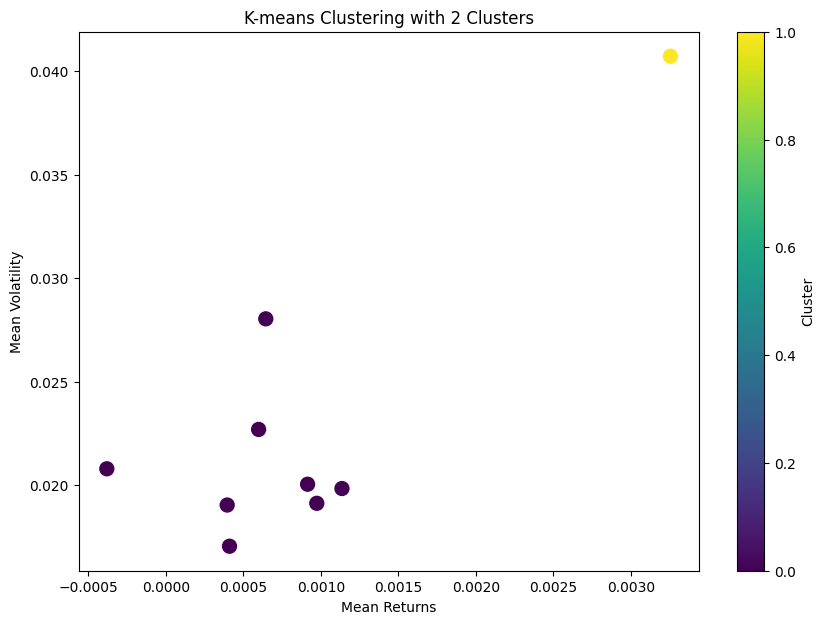

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(features['Mean_Returns'], features['Mean_Volatility'], c=features['Cluster'], cmap='viridis', s=100)
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.xlabel('Mean Returns')
plt.ylabel('Mean Volatility')
plt.colorbar(label='Cluster')
plt.show()